In [146]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
import time
import sys
from tqdm import tqdm

warnings.filterwarnings('ignore') 

# some setting
%matplotlib inline
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [147]:
train_df =  pd.read_csv("../input/train/train.csv")
test_df = pd.read_csv("../input/test/test.csv")
train_df.columns = ['time','year','month','day','hour','min','sec','outdoorTemp','outdoorHum','outdoorAtmo','indoorHum','indoorAtmo', 'temperature']
test_df.columns = ['time','year','month','day','hour','min','sec','outdoorTemp','outdoorHum','outdoorAtmo','indoorHum',      'indoorAtmo']

In [148]:
train_df.head()  # (25497, 14)

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo,temperature
0,1552496443,2019,3,14,1,0,43,14.6,85.0,993.1,80.0,992.4,15.4
1,1552496503,2019,3,14,1,1,43,14.7,84.0,993.0,80.0,992.6,15.4
2,1552496565,2019,3,14,1,2,45,14.7,84.0,992.7,80.0,992.8,15.4
3,1552496624,2019,3,14,1,3,44,14.6,85.0,993.2,80.0,992.6,15.4
4,1552496682,2019,3,14,1,4,42,14.6,85.0,992.7,80.0,992.6,15.3


In [149]:
test_df.head() # (406, 12)

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo
0,1554224413,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3
1,1554226217,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0
2,1554228020,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3
3,1554229823,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7
4,1554231625,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9


In [154]:
for c in ['year', 'month', 'day', 'hour', 'min', 'sec']:
    train_df[c] = train_df[c].map(int)
    test_df[c] = test_df[c].map(int)

In [155]:
train_df['tm'] = train_df.apply(lambda df: str(df['year']) + '-' + str(df['month']) + '-' + str(df['day'])\
                                + ' ' + str(df['hour']) + ':' +str(df['min']) + ':' +str(df['sec']), axis = 1)
train_df['tm'] = train_df['tm'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))


test_df['tm'] = test_df.apply(lambda df: str(df['year']) + '-' + str(df['month']) + '-' + str(df['day'])\
                                + ' ' + str(df['hour']) + ':' +str(df['min']) + ':' +str(df['sec']), axis = 1)
test_df['tm'] = test_df['tm'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))


In [156]:
train_df.sort_values(by = 'tm', ascending = True).head()
test_df.sort_values(by = 'tm', ascending = True).head()

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo,tm
0,1554224413,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3,2019-04-03 01:00:13
1,1554226217,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0,2019-04-03 01:30:17
2,1554228020,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3,2019-04-03 02:00:20
3,1554229823,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7,2019-04-03 02:30:23
4,1554231625,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9,2019-04-03 03:00:25


In [157]:
test_df_sort.head()

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo,tm
0,1554224413,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3,2019-04-03 01:00:13
1,1554226217,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0,2019-04-03 01:30:17
2,1554228020,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3,2019-04-03 02:00:20
3,1554229823,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7,2019-04-03 02:30:23
4,1554231625,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9,2019-04-03 03:00:25


In [158]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,25497.0,1.553344e+09,501179.136297,1.552496e+09,1.552917e+09,1.553342e+09,1.553774e+09,1.554224e+09
year,25497.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
month,25497.0,3.097619e+00,0.296805,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
day,25497.0,2.029937e+01,7.938573,1.000000e+00,1.600000e+01,2.200000e+01,2.600000e+01,3.100000e+01
hour,25497.0,1.206287e+01,6.895092,0.000000e+00,6.000000e+00,1.300000e+01,1.800000e+01,2.300000e+01
min,25497.0,2.958344e+01,17.282217,0.000000e+00,1.500000e+01,3.000000e+01,4.500000e+01,5.900000e+01
sec,25497.0,2.961497e+01,17.218067,0.000000e+00,1.500000e+01,3.000000e+01,4.400000e+01,5.900000e+01
outdoorTemp,24837.0,1.652923e+01,4.249602,8.900000e+00,1.330000e+01,1.590000e+01,1.860000e+01,3.260000e+01
outdoorHum,24837.0,7.435801e+01,16.349346,2.300000e+01,6.400000e+01,7.800000e+01,8.800000e+01,9.600000e+01
outdoorAtmo,24837.0,9.836386e+02,22.990619,4.002000e+02,9.799000e+02,9.861000e+02,9.904000e+02,1.082500e+03


In [159]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,406.0,1.554651e+09,258348.177433,1.554224e+09,1.554414e+09,1.554649e+09,1.554891e+09,1.555088e+09
year,406.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
month,406.0,4.000000e+00,0.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
day,406.0,7.463054e+00,2.972693,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01,1.300000e+01
hour,406.0,1.206650e+01,7.002857,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
min,406.0,2.671429e+01,17.802542,0.000000e+00,1.000000e+01,3.000000e+01,4.075000e+01,5.900000e+01
sec,406.0,2.896305e+01,17.125711,0.000000e+00,1.400000e+01,2.800000e+01,4.400000e+01,5.900000e+01
outdoorTemp,404.0,2.137450e+01,5.557689,1.310000e+01,1.660000e+01,2.060000e+01,2.510000e+01,3.670000e+01
outdoorHum,404.0,6.640842e+01,18.728941,2.500000e+01,5.200000e+01,6.600000e+01,8.300000e+01,9.500000e+01
outdoorAtmo,404.0,9.781233e+02,12.948420,9.011000e+02,9.742500e+02,9.787000e+02,9.868000e+02,1.062600e+03


In [160]:
### ====================== some utils ====================== 
## 查看数据基本缺失情况
def exploration(df,almost_empty=0.9):

    start = time.time()
    
    n,m = df.shape[0],df.shape[1] 
    dtypes = pd.DataFrame(df.dtypes)
    
    # Missing Values, Nunique, Data Type
    dtypes.columns = ['data types']
    null = pd.DataFrame(df.isnull().sum())
    null.columns = ['none cnt']
    null['none percentage'] = (null['none cnt']/n).apply(lambda x: "{0:.2f}%".format(x * 100))
    null['empty'] = 1*(null['none cnt']==n)
    null['>='+str(int(almost_empty*100))+'% empty']=1*(null['none cnt']/n>=almost_empty)
    
    nunique = pd.DataFrame(df.nunique())
    nunique.columns = ['n_unique']
    
    explore_df = pd.concat([dtypes,null,nunique],axis=1)
    
    
    
    end = time.time()
    
    print('function finished one time, time cost {}seconds'.format(np.round(end-start,2)))
    
    return explore_df






def get_trend_plot(df, features, title):
    """
    : param df: DataFrame
    : features: List : feature name 
    """
    fig, ax=plt.subplots(figsize=(8, 6))
    #colors = ['red', 'yellow', 'blue', 'lightsalmon']

    for c in features:
        sns.lineplot(df['tm'], df[c], alpha=0.9, markers= True, dashes=False, palette= "Set3")
    lg = plt.legend(labels = features, loc = "lower left")
    lg.draw_frame(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel(title, fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.xticks(rotation = 45) 
    plt.title( title + " "+ "Trend Plot", fontsize = 16)
    plt.show()







In [161]:
train_explore = exploration(train_df)
test_explore = exploration(test_df)

function finished one time, time cost 0.39seconds
function finished one time, time cost 0.01seconds


In [162]:
train_explore.sort_values(by = "none cnt", ascending= False)

,data types,none cnt,none percentage,empty,>=90% empty,n_unique
indoorHum,float64,690,2.71%,0,0,67
indoorAtmo,float64,690,2.71%,0,0,456
temperature,float64,690,2.71%,0,0,209
outdoorTemp,float64,660,2.59%,0,0,238
outdoorHum,float64,660,2.59%,0,0,74
outdoorAtmo,float64,660,2.59%,0,0,743
time,int64,0,0.00%,0,0,25497
year,int64,0,0.00%,0,0,1
month,int64,0,0.00%,0,0,2
day,int64,0,0.00%,0,0,21


In [163]:
test_explore.sort_values(by = "none cnt", ascending= False)

,data types,none cnt,none percentage,empty,>=90% empty,n_unique
outdoorTemp,float64,2,0.49%,0,0,168
outdoorHum,float64,2,0.49%,0,0,69
outdoorAtmo,float64,2,0.49%,0,0,207
indoorHum,float64,1,0.25%,0,0,62
indoorAtmo,float64,1,0.25%,0,0,200
time,int64,0,0.00%,0,0,406
year,int64,0,0.00%,0,0,1
month,int64,0,0.00%,0,0,1
day,int64,0,0.00%,0,0,11
hour,int64,0,0.00%,0,0,24


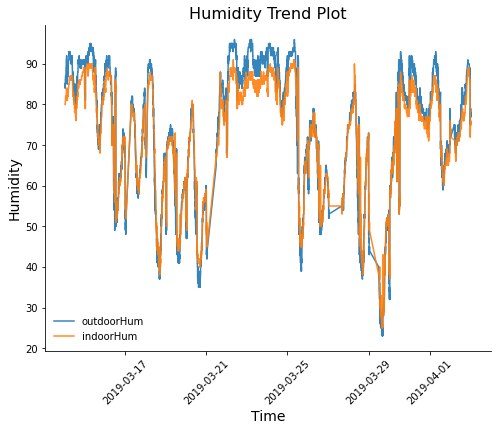

In [164]:
get_trend_plot(train_df, ['outdoorHum', 'indoorHum'], 'Humidity')

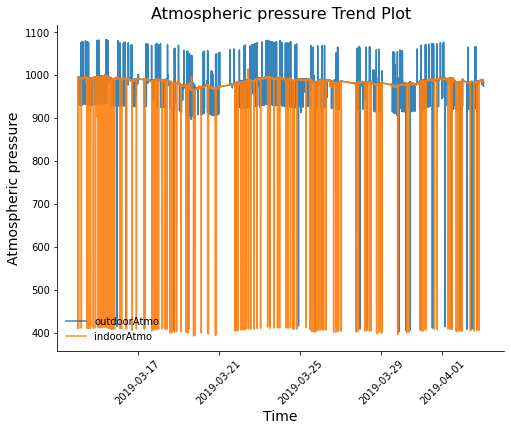

In [165]:
# cond = train_df['outdoorAtmo'] != None
get_trend_plot(train_df, ['outdoorAtmo', 'indoorAtmo'], 'Atmospheric pressure')

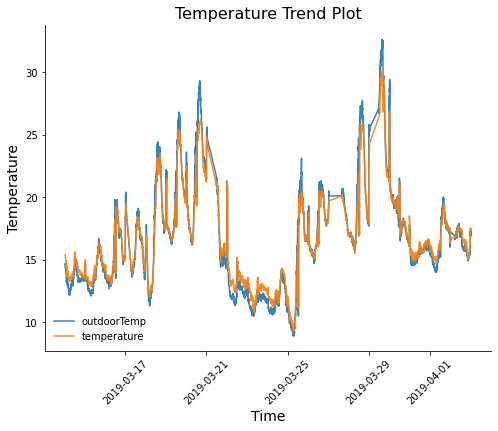

In [166]:
get_trend_plot(train_df, ['outdoorTemp', 'temperature'], 'Temperature')

In [200]:
### 利用前几项的均值进行填充
for c in tqdm(['outdoorTemp', 'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'temperature']):
    train_df[c].fillna(train_df[c].rolling(5, min_periods = 1).mean(), inplace = True)

100%|██████████| 6/6 [00:00<00:00, 554.31it/s]
